In [1]:
import pandas as pd

# Load the pipe-delimited file
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|', parse_dates=['TransactionMonth'])

# Quick check
print(data.shape)
data.head()


C:\Users\kalki\AppData\Local\Temp\ipykernel_19072\2128529878.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|', parse_dates=['TransactionMonth'])


(1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [2]:
# Check column types
data.dtypes

# Check missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
Cylinders                      552
bodytype                       552
kilowatts                      552
NumberOfDoors                  552
VehicleIntroDate               552
cubiccapacity                  552
CapitalOutstanding               2
dtype: int64

In [3]:
# Numerical summary
data.describe()

# Categorical summary
categorical_cols = ['Gender', 'Province', 'VehicleType', 'make', 'Model', 'CoverCategory']
for col in categorical_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts().head(10))
    print("\n")


--- Gender ---
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64


--- Province ---
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64


--- VehicleType ---
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64


--- make ---
make
TOYOTA                                 813280
MERCEDES-BENZ                           41940
CMC                                     21624
VOLKSWAGEN                              20929
C.A.M                                   16171
GOLDEN JOURNEY                          14462
NISSAN/DATSUN                           10997
JINBEI                                  10374
IVECO                 

c:\Users\kalki\anaconda3\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Overall Loss Ratio: nan


<Axes: title={'center': 'Average Loss Ratio by Province'}, xlabel='Province'>

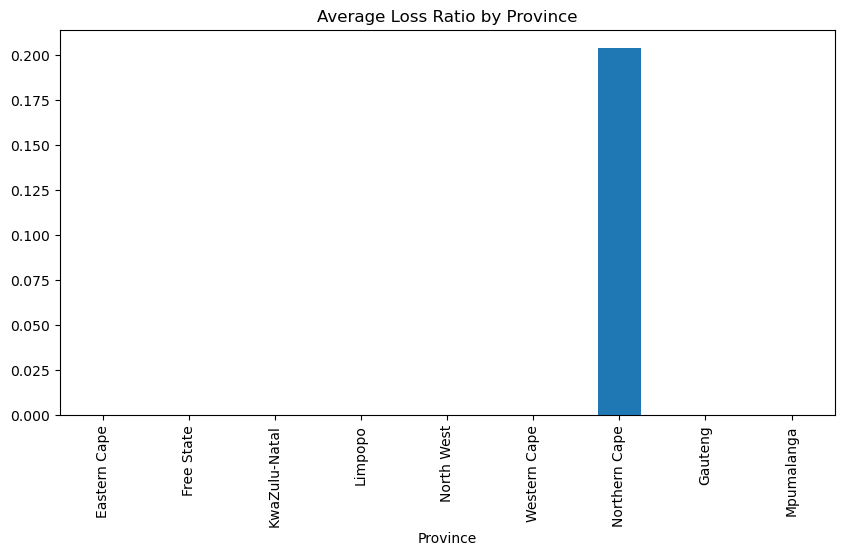

In [4]:
# Loss Ratio = TotalClaims / TotalPremium
data['TotalPremium'] = pd.to_numeric(data['TotalPremium'], errors='coerce')
data['TotalClaims'] = pd.to_numeric(data['TotalClaims'], errors='coerce')

data['LossRatio'] = data['TotalClaims'] / data['TotalPremium']

# Overall Loss Ratio
overall_lr = data['LossRatio'].mean()
print(f"Overall Loss Ratio: {overall_lr:.2f}")

# Loss Ratio by Province
province_lr = data.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)
province_lr.plot(kind='bar', figsize=(10,5), title='Average Loss Ratio by Province')


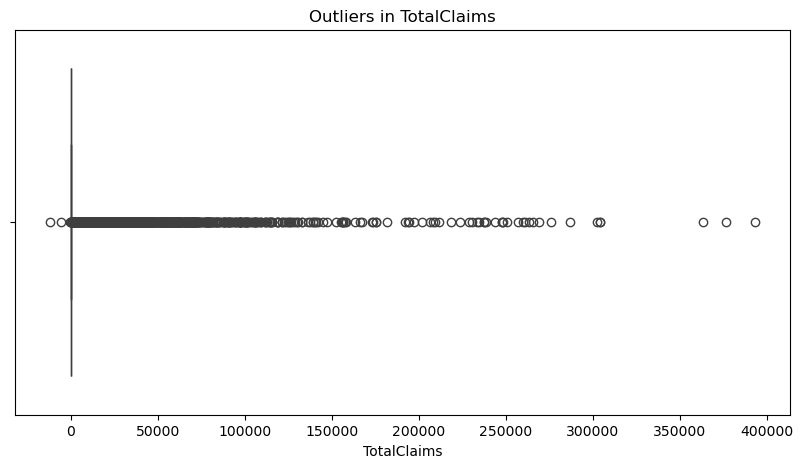

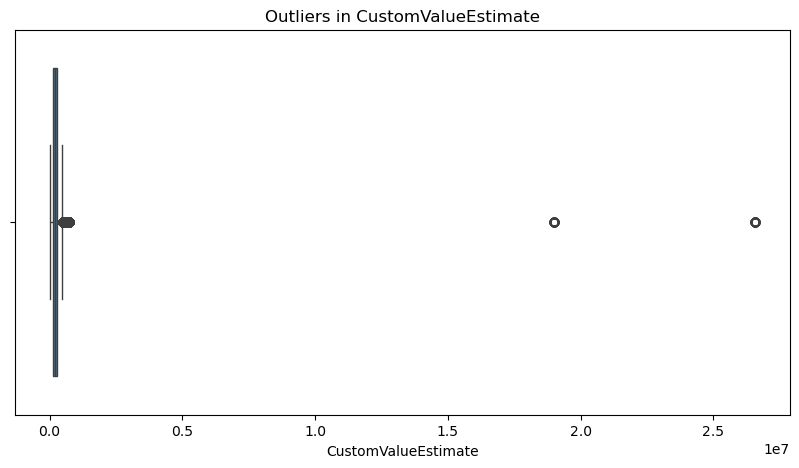

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for TotalClaims
plt.figure(figsize=(10,5))
sns.boxplot(x=data['TotalClaims'])
plt.title("Outliers in TotalClaims")
plt.show()

# Boxplot for CustomValueEstimate
plt.figure(figsize=(10,5))
sns.boxplot(x=data['CustomValueEstimate'])
plt.title("Outliers in CustomValueEstimate")
plt.show()


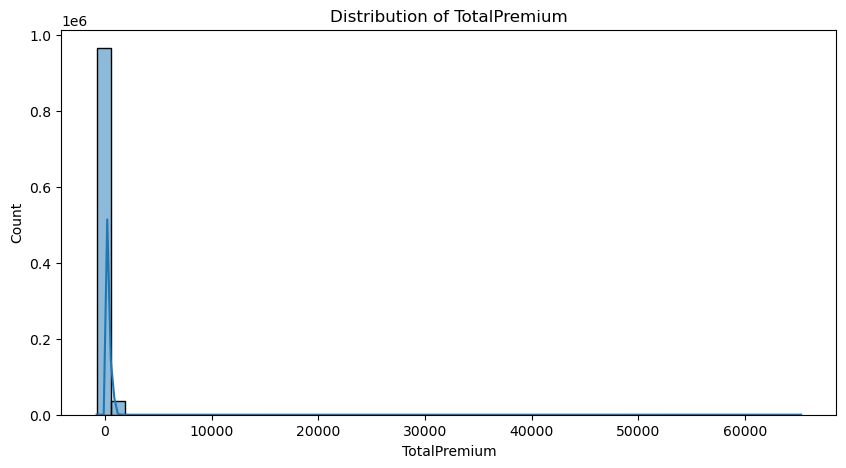

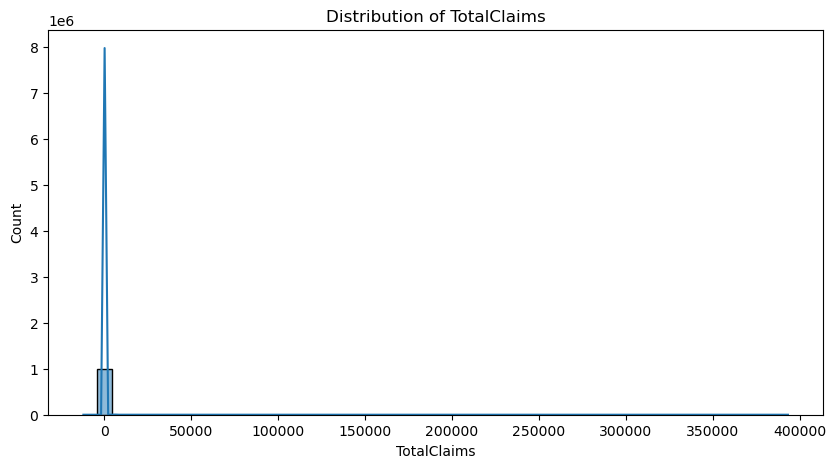

In [6]:
# Histogram for TotalPremium
plt.figure(figsize=(10,5))
sns.histplot(data['TotalPremium'], bins=50, kde=True)
plt.title("Distribution of TotalPremium")
plt.show()

# Histogram for TotalClaims
plt.figure(figsize=(10,5))
sns.histplot(data['TotalClaims'], bins=50, kde=True)
plt.title("Distribution of TotalClaims")
plt.show()


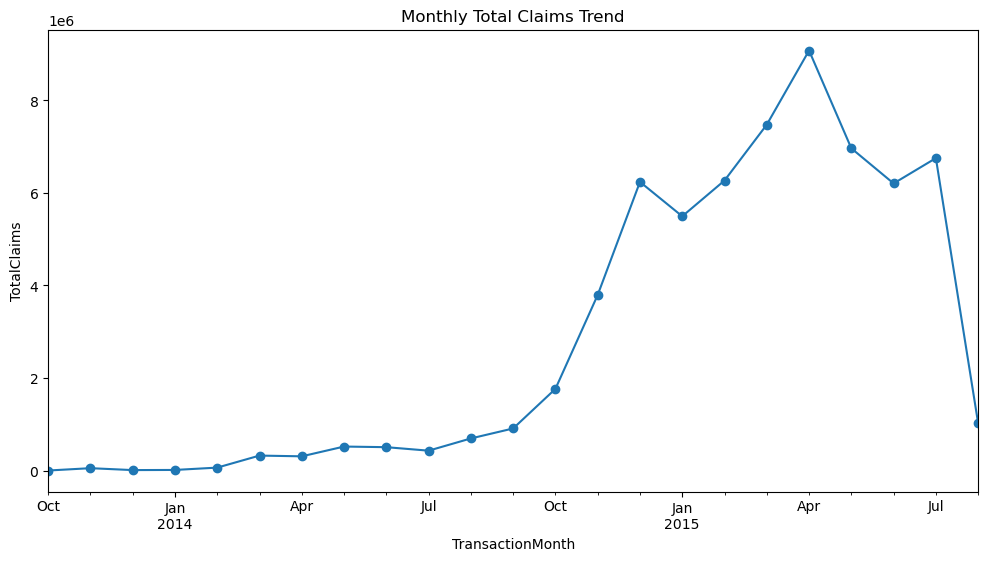

In [7]:
# Monthly TotalClaims
monthly_trend = data.groupby('TransactionMonth')['TotalClaims'].sum()
monthly_trend.plot(figsize=(12,6), marker='o', title='Monthly Total Claims Trend')
plt.ylabel('TotalClaims')
plt.show()


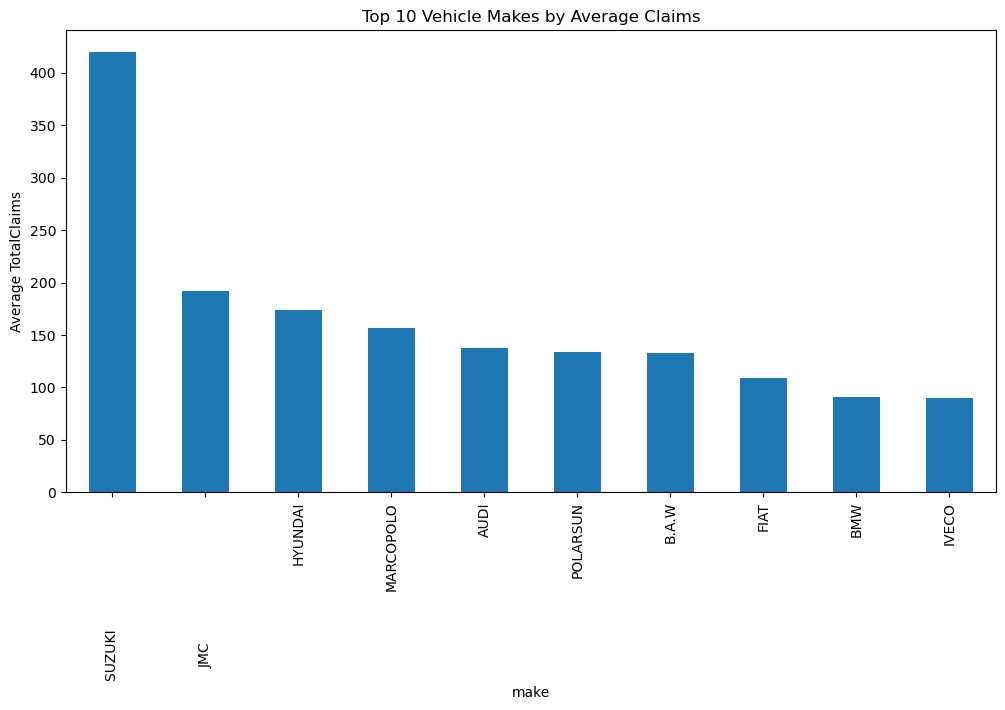

In [8]:
# Top 10 vehicle makes by average claim
vehicle_claims = data.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(10)
vehicle_claims.plot(kind='bar', figsize=(12,6), title='Top 10 Vehicle Makes by Average Claims')
plt.ylabel('Average TotalClaims')
plt.show()


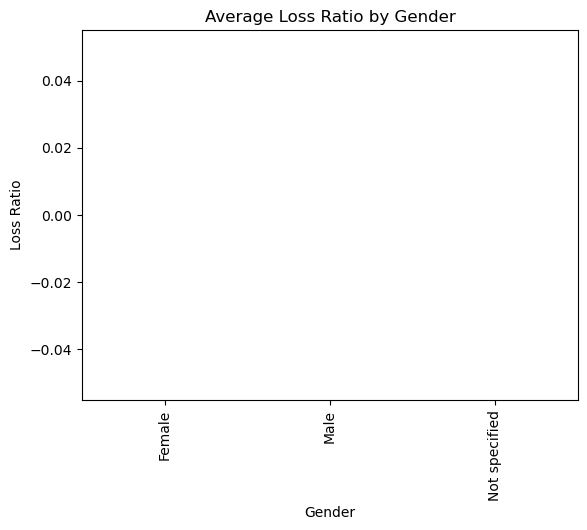

In [9]:
# Loss Ratio by Gender
gender_lr = data.groupby('Gender')['LossRatio'].mean()
gender_lr.plot(kind='bar', title='Average Loss Ratio by Gender')
plt.ylabel('Loss Ratio')
plt.show()


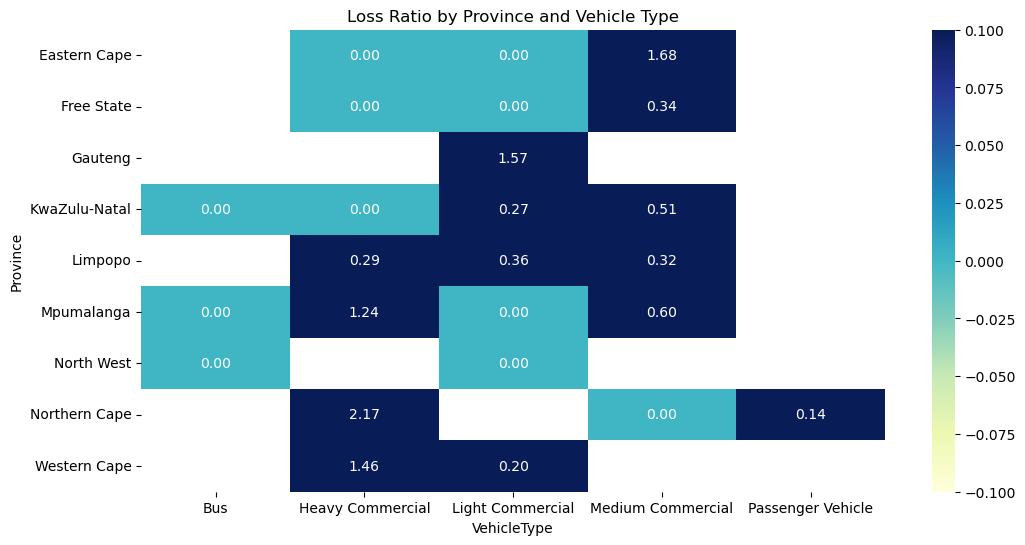

In [10]:
province_vehicle_lr = data.pivot_table(values='LossRatio', index='Province', columns='VehicleType', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(province_vehicle_lr, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Loss Ratio by Province and Vehicle Type")
plt.show()


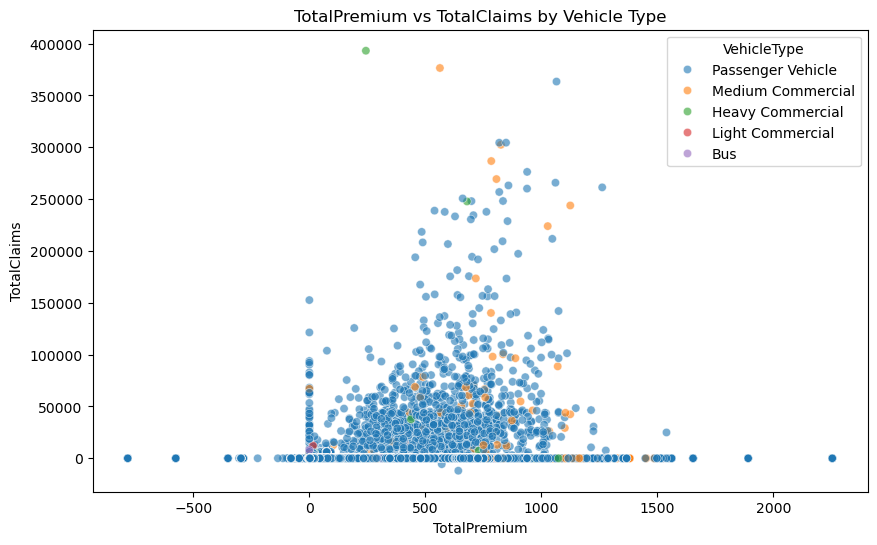

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='VehicleType', alpha=0.6)
plt.title("TotalPremium vs TotalClaims by Vehicle Type")
plt.show()


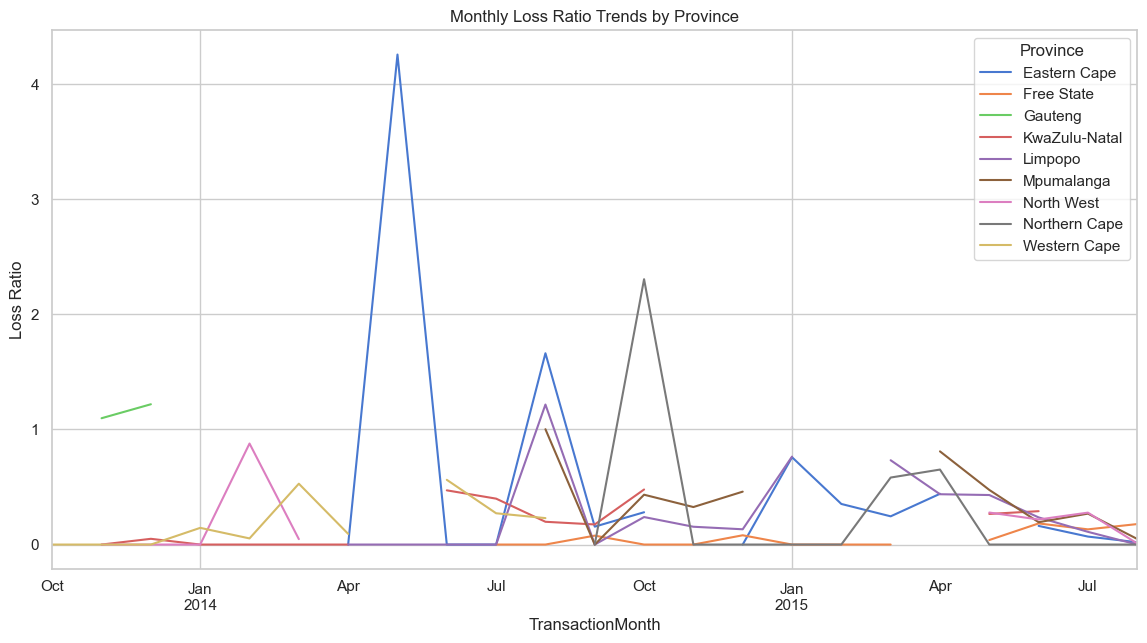

In [19]:
monthly_province_lr = data.groupby(['TransactionMonth', 'Province'])['LossRatio'].mean().unstack()
monthly_province_lr.plot(figsize=(14,7))
plt.title("Monthly Loss Ratio Trends by Province")
plt.ylabel("Loss Ratio")
plt.show()
